Ex 4.9 Lisa Coombs Intro to Data Visualizations with Python

This script contains the following for PART 2:
1. Import Libraries
2. Create Path
3. Task 1: Import Fully Joined Dataframes: Ords_Prods_Cust_Merge
4. Task 2: From the tutorial in the reading, create Bar chart, Histogram, Scatterplot and Line chart (using a subset for the line chart)

                a. Will include the entire script from the tutorial in the reading with my final submission

5. Task 3: Provide senior stakeholders with descriptive findings about Sales

               a. Create Histogram from "order_hour_of_day" column
               b. In markdown cell, describe what the histogram demostrates
   
6. Task 4: Marketing team wants to understand more about loyalty among customers
 
                a. Create bar chart from "loyalty_flag" column
    
7. Task 5: Create Line chart to check if there's a difference in spending in the "prices" column vs. the "hour_of_day" column

8. Task 6: Conduct exploratory analysis on the customer demographics to support the marketing team with targeted campaigns
 
               a. Create Line chart to determine if there's a connection between age and family situation
               b. In markdown cell, describe what the line chart shows
    
9. Task 7: Create scatterplot to explore if there is a connection between age and income

               a. In markdown cell, describe what the scatterplot shows.


10. Export DataFrame to .pkl file in Prepared Data folder

1. ***Import Libraries***

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. ***Create Path***

In [5]:
path=r'C:\Users\lisac\10-10-2024 Instacart Basket Analysis'

3. ***Import fully joined dataframes***

In [7]:
df_opc=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl' ))

4. ***Task 2: From the tutorial in the reading, create Bar chart, Histogram, Scatterplot and Line chart (using a subset for the line chart)***
#This will be made available in a separate script "4.9 Lisa Coombs Reading Tutorial Intro to Python Visualizaitons" with my final submission, including Parts 1 and 2.

5. ***Task 3: Provide senior stakeholders with descriptive findings about Sales***

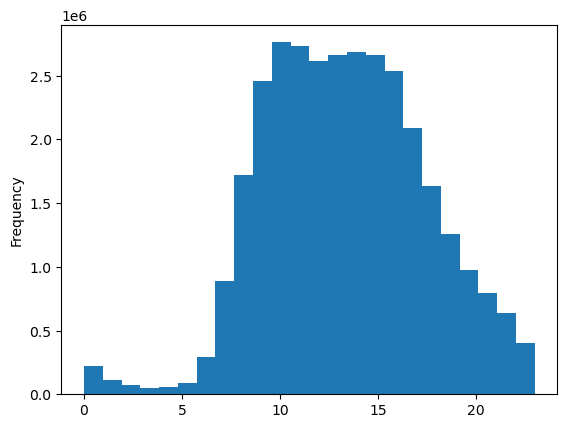

In [10]:
#Create Histogram from the "order_hour_of_day" column
hist=df_opc['order_hour_of_day'].plot.hist(bins=24)

Observation:  The x-axis is the hour of the day and the y-axis is the frequency (how many orders) are placed during that hour. "1e6" means millions; therefore, the frequency is based on millions of orders.  For example, orders placed at 5am are approximately 100,000, whereas orders placed just five hours later at 10am, increased to nearly 2.8 million orders.  Peak order hours are from approx 10am to 4pm.  Orders start to taper off around the 5 o'clock hour and continue downward until 10pm.

In [12]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day_frequency.png'))                                 

6. ***Task 4: Marketing team wants to understand more about loyalty among customers***

<Axes: xlabel='loyalty_flag'>

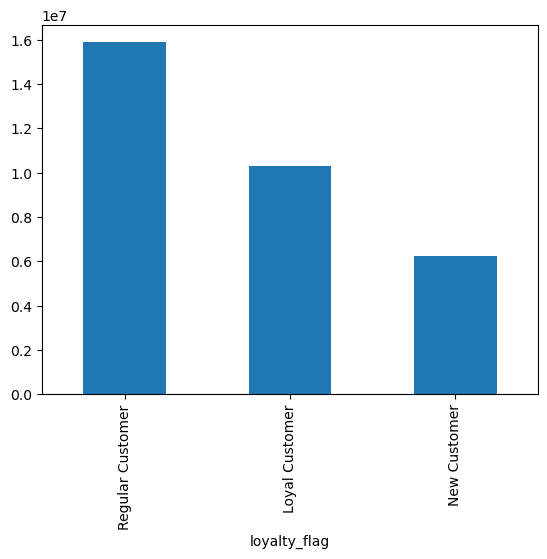

In [14]:
#Create bar chart from "loyalty_flag" column
df_opc['loyalty_flag'].value_counts().plot.bar()

Observation: From the three levels of loyalty: Regular, Loyal and New, it looks like the Regular customers are the most loyal, following up with Loyal
customers and then New customers.

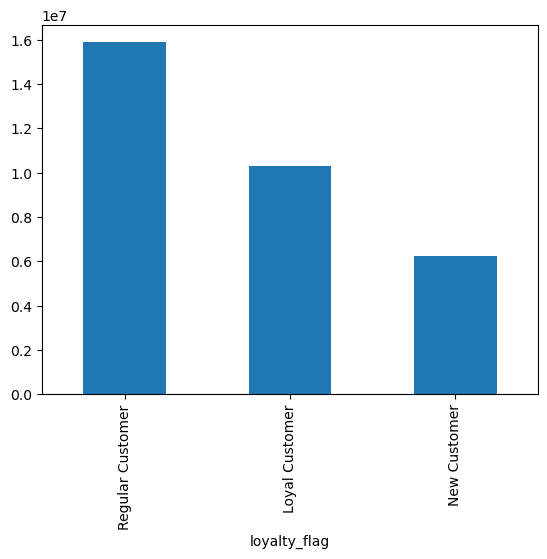

In [16]:
#Saving the bar chart as an object
bar = df_opc['loyalty_flag'].value_counts().plot.bar()

In [17]:
#Exporting bar chart as a .png file
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag_distribution'))

7. ***Task 5: Create Line chart to check if there's a difference in spending in the "prices" column vs. the "hour_of_day" column***

In [19]:
#Create random sample by generating a seed
np.random.seed(4)

In [20]:
#Create random sampling of dataframe (70% / 30%) using .random.rand() function
#Create a listing holding True/False values to the test np.random.rand() function
dev=np.random.rand(len(df_opc))<=0.7

In [21]:
#Store 70% of datafrome in 'big'
big=df_opc[dev]

In [22]:
#Store 30% of dataframe in 'small'
small=df_opc[~dev]

In [23]:
#Checking to make sure results of the split are in line with the conditions
len(df_opc)

32404859

In [24]:
#Checking accuracy of 70/30 breakdown
len(big)+len(small)

32404859

Observation:  Successfully created 70/30 split for random sampling of df_opc.  

In [26]:
#Create separate dataframe with just 'prices' and 'order_hour_of_day" column in df_2
df_2=small[['prices', 'order_hour_of_day']]

In [27]:
#Confirm only 'prices' and 'order_hour_of_day" columns in df_2
df_2.head(3)

,prices,order_hour_of_day
0,9.0,8
2,4.4,8
3,4.7,8


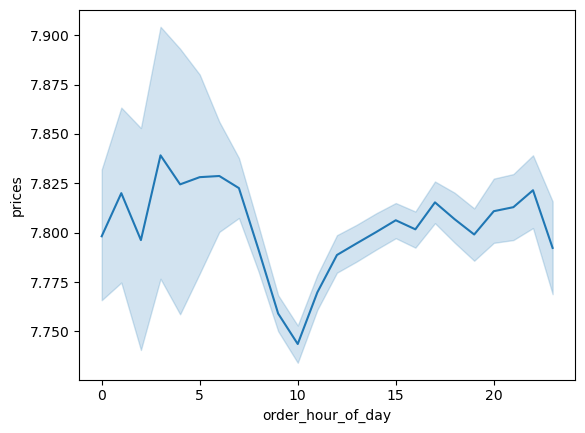

In [28]:
#Create Line chart
line=sns.lineplot(data=df_2, x='order_hour_of_day', y='prices')

Observation:  This line chart represents how the prices (y-axis) fluctuate throughout the hours of the day.  For example, pricing peaks just before 5am
and just after 11pm, while dropping to its lowest point at about 10am.  The translucent blue around the solid blue line is quite interesting.  It 
represents the variability or uncertainty in the data.  There is a wider variability in pricing from about midnight (0 hour) to about 6am.  Then the 
variability narrows considerably from about 7am 1pm.  After 1pm, the variability does widen a bit for the rest of the day, but not as significantly as
it does in the early morning hours of the day. Interesting note, my laptop was running at 90% to 100% while generating this line chart.  It took 32 minutes to execute.

In [30]:
# Save the figure using get_figure()
# Get the figure object
line_figure = line.get_figure()  

# Export the figure as PNG
line_figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_chart_prices.png'))  

# Close the figure to free up memory
plt.close()

8. ***Task 6: Conduct exploratory analysis on the customer demographics to support the marketing team with targeted campaigns***

In [32]:
#Create separate dataframe with just 'prices' and 'hour_of_day" column in it
df_3=small[['Age', 'Number of Dependents']]

In [33]:
#Confirm only 'Age' and 'Number_of_Dependents' columns in df_3
df_3.head(3)

,Age,Number of Dependents
0,31,3
2,31,3
3,31,3


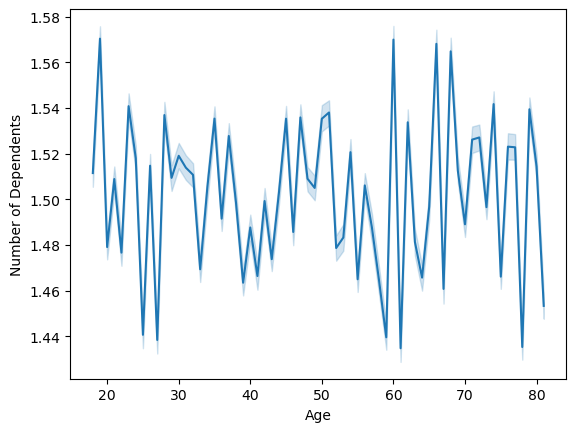

In [65]:
#Create Line chart to determine if there's a connection between age and family situation (number of dependents)
line_2=sns.lineplot(data=df_3, x='Age', y='Number of Dependents')

Observation:  There doesn't seem to be a relationship between age and number of dependents.  One and a half dependents seems to be the average, however 

In [66]:
# Save the figure using get_figure()
# Get the figure object
line_2_figure = line_2.get_figure()  

# Export the figure as PNG
line_2_figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_2_age_vs_number_of_dependents.png'))  

# Close the figure to free up memory
plt.close()

9. ***Task 7: Create scatterplot to explore possible connection between age and income***

In [68]:
#Create separate dataframe with just 'Age' and 'Income" columns 
df_4=small[['Age', 'Income']]

In [69]:
#Confirm only 'Age' and 'Income' columns in df_4
df_4.head(3)

,Age,Income
0,31,40423
2,31,40423
3,31,40423


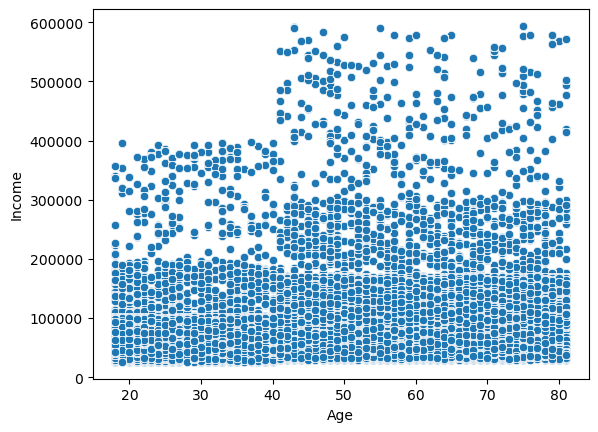

In [70]:
#Create scatterplot to explare possible connection between age and income
scatterplot = sns.scatterplot(x='Age', y='Income', data=df_4)

Observation:  From age 40 to 80, there seems to be a high concentration of income in the 200K-300K range.  Individuals under 40 years old have a concentration of up to 200K earnings.  Additionally, there seems to be a cluster of individuals earning 400K or above in the 40-50 age bracket.  There are high income earners in age bracket 60-80, with earnings upwards of 500K.

In [72]:
# Get the figure object associated with the scatterplot
scatterplot_figure = scatterplot.get_figure()

# Save the figure as a PNG file
scatterplot_figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_vs_income.png'))

# Close the figure to free up memory
plt.close(scatterplot_figure)

10. ***Export DataFrame as .pkl file to Prepared Data folder***

In [85]:
df_opc.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merge_12.16.pkl'))